In [5]:
import random
import networkx as nx

class TaskSimulator:
    def __init__(self, num_tasks=6, quantum_ratio=0.3, max_duration=5):
        self.num_tasks = num_tasks
        self.quantum_ratio = quantum_ratio
        self.max_duration = max_duration
        self.task_id_counter = 0

    def generate_task(self, task_type):
        self.task_id_counter += 1
        return {
            "id": f"T{self.task_id_counter}",
            "type": task_type,                          # 'quantum' or 'classical'
            "need": "QPU" if task_type == "quantum" else "CPU",
            "duration": random.randint(1, self.max_duration),
            "priority": random.randint(1, 3),
        }

    def generate_dag(self):
        # 1. 生成 DAG 结构
        G = nx.gn_graph(self.num_tasks, seed=None)  # 可用更复杂模型
        G = G.reverse()  # 转换方向使早期节点指向后续节点（更直觉）

        # 2. 分配任务类型（根据比例）
        task_types = random.choices(
            population=["quantum", "classical"],
            weights=[self.quantum_ratio, 1 - self.quantum_ratio],
            k=self.num_tasks
        )

        task_map = {}
        for i in range(self.num_tasks):
            task = self.generate_task(task_types[i])
            task_map[i] = task

        # 3. 构造最终任务图结构
        dag = {
            "tasks": list(task_map.values()),
            "edges": [(u, v) for u, v in G.edges()]  # 表示 task u → task v 的依赖
        }

        return dag

In [8]:
#from task_simulator import TaskSimulator
import pprint

sim = TaskSimulator(num_tasks=6, quantum_ratio=0.45)
dag = sim.generate_dag()

pprint.pprint(dag)

{'edges': [(0, 1), (0, 2), (2, 3), (2, 4), (2, 5)],
 'tasks': [{'duration': 4,
            'id': 'T1',
            'need': 'QPU',
            'priority': 2,
            'type': 'quantum'},
           {'duration': 1,
            'id': 'T2',
            'need': 'CPU',
            'priority': 3,
            'type': 'classical'},
           {'duration': 2,
            'id': 'T3',
            'need': 'CPU',
            'priority': 3,
            'type': 'classical'},
           {'duration': 3,
            'id': 'T4',
            'need': 'CPU',
            'priority': 2,
            'type': 'classical'},
           {'duration': 5,
            'id': 'T5',
            'need': 'QPU',
            'priority': 1,
            'type': 'quantum'},
           {'duration': 5,
            'id': 'T6',
            'need': 'QPU',
            'priority': 2,
            'type': 'quantum'}]}


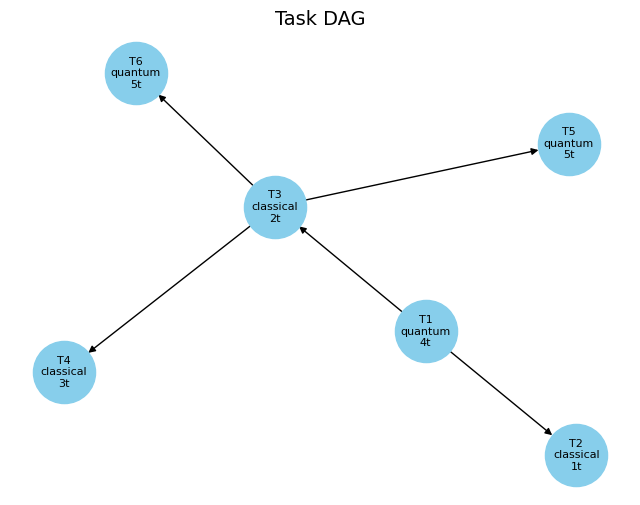

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_dag(dag):
    G = nx.DiGraph()
    for i, task in enumerate(dag["tasks"]):
        label = f'{task["id"]}\n{task["type"]}\n{task["duration"]}t'
        G.add_node(i, label=label)
    G.add_edges_from(dag["edges"])

    pos = nx.spring_layout(G, seed=42)  
    labels = nx.get_node_attributes(G, 'label')

    fig, ax = plt.subplots(figsize=(8, 6))  
    nx.draw(
        G,
        pos,
        with_labels=True,
        labels=labels,
        node_color='skyblue',
        node_size=2000,
        font_size=8,
        ax=ax  
    )
    ax.set_title("Task DAG", fontsize=14)
    plt.show()

draw_dag(dag)